# Flow Stats tgen vs. markov model

In [1]:
import json
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
from typing import Dict, List, Tuple, Union
import numpy as np

In [2]:
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

In [3]:
sns.set(rc={"figure.figsize":(6, 5)}) 

mpl.rcParams['figure.dpi'] = 100

sns.color_palette("Set2")

sns.set(font_scale=1.1, style='whitegrid')

In [4]:
# load our aggregated file
p = os.path.dirname(os.path.dirname(os.getcwd()))
results_dir = os.path.join(p, 'results', 'flow-stats')
filename_tgen = "flow_stats_tgen.json"
filename_mmodel = "flow_stats_mmodel.json"

abs_filename_tgen: str = os.path.join(results_dir, filename_tgen)
abs_filename_mmodel: str = os.path.join(results_dir, filename_mmodel)

data_dict_tgen: Dict[str, Dict[str, Union[int, List[int]]]] = None
data_dict_mmodel: Dict[str, Dict[str, Union[int, List[int]]]] = None

# read the file
with open(abs_filename_tgen) as f:
    data_dict_tgen = json.load(f)

with open(abs_filename_mmodel) as f:
    data_dict_mmodel = json.load(f)

In [5]:
# we want:
# * one df containing the (percent) idle time for tgen vs mmodel
# * one df with columns: "kind" (tgen/mmodel), "duration", "inter-creation-interval", where one row represents one flow.

In [6]:
data_dict_tgen

{'0': {'idle_time_stream_creation': 0,
  'idle_time_first_payload': 395498,
  'flow_durations': [7200000000,
   7175653678,
   7117402790,
   6989234993,
   6921947331,
   6661877516,
   6061877516,
   5938623567,
   5338623567,
   5242777963,
   5015130475,
   4641290036,
   4624317908,
   4351776349,
   3751776349,
   3540284798,
   3123404764,
   3041284443,
   2686447063,
   2086447063,
   2069854966,
   1856447850,
   1484682158,
   1311151099,
   1033266192,
   950139059,
   801919049,
   413743098,
   340185071],
  'inter_flow_generation_intervals': [0,
   24346322,
   58250888,
   128167797,
   67287662,
   260069815,
   600000000,
   123253949,
   600000000,
   95845604,
   227647488,
   373840439,
   16972128,
   272541559,
   600000000,
   211491551,
   416880034,
   82120321,
   354837380,
   600000000,
   16592097,
   213407116,
   371765692,
   173531059,
   277884907,
   83127133,
   148220010,
   388175951,
   73558027],
  'med_time_to_first_payload_streams': [395498.0,

In [7]:
idle_time_dict = {"kind": [], "percent_idle": [], "num_flows": []}

for key, val in data_dict_tgen.items():

    idle_time_dict["kind"].append("tgen")
    
    percent_idle_val: float = val["idle_time_first_payload"]/7200000000

    idle_time_dict["percent_idle"].append(percent_idle_val)

    idle_time_dict["num_flows"].append(len(val["flow_durations"]))

for key, val in data_dict_mmodel.items():

    idle_time_dict["kind"].append("markov_model")
    
    percent_idle_val: float = val["idle_time_total"]/7200000000

    idle_time_dict["percent_idle"].append(percent_idle_val)

    idle_time_dict["num_flows"].append(len(val["flow_durations"]))

In [8]:
idle_time_dict

{'kind': ['tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  

In [9]:
idle_time_df = pd.DataFrame.from_dict(idle_time_dict)

In [10]:
idle_time_df[idle_time_df["kind"] == "markov_model"]

,kind,percent_idle,num_flows
940,markov_model,0.013931,25
941,markov_model,0.012064,27
942,markov_model,0.048154,20
943,markov_model,0.007953,26
944,markov_model,0.145147,16
...,...,...,...
1943,markov_model,0.026877,26
1944,markov_model,0.007949,30
1945,markov_model,0.093040,29
1946,markov_model,0.143047,20


In [11]:
actual_idle_time_df = idle_time_df[idle_time_df["percent_idle"] > 0.000000]

In [12]:
actual_idle_time_df[actual_idle_time_df["kind"] == "tgen"]["percent_idle"].median()

0.0002511709722222222

In [13]:
actual_idle_time_df[actual_idle_time_df["kind"] == "tgen"]["percent_idle"].std()

0.03858886177232489

In [14]:
actual_idle_time_df[actual_idle_time_df["kind"] == "markov_model"]["percent_idle"].median()

0.06561644819444444

In [15]:
actual_idle_time_df[actual_idle_time_df["kind"] == "markov_model"]["percent_idle"].std()

0.06044515426652477

In [16]:
idle_time_df = idle_time_df.rename(columns={"kind": "Modeling Approach", "num_flows": "Number of Flows Created"})

In [17]:
idle_time_df['Modeling Approach'] = np.where(idle_time_df['Modeling Approach'] == "tgen", "Full tgen","Markov Model Only")

In [18]:
pal = sns.color_palette(
    ["#4477AA", "#EE6677", "#228833", "#CCBB44", "#66CCEE", "#AA3377", "#BBBBBB"]
)
sns.set_palette(pal)

In [ ]:
#plt.xlim([0.00,0.35])
percent_idle_tgen_only_plot = sns.ecdfplot(idle_time_df[idle_time_df["Modeling Approach"] == "Full tgen"], x="percent_idle")
percent_idle_tgen_only_plot.set(xlabel='Percent Idle Time')
(percent_idle_tgen_only_plot.get_figure()).savefig('../../plots/percent_idle_tgen_only.pdf')

/var/folders/b0/v5cl87nj5q5_f0wrtyh4g4kw0000gn/T/ipykernel_84169/2736646046.py:4: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for lines, linestyle, legend_handle in zip(percent_idle_plot.lines[::-1], ['-', '--'], percent_idle_plot.legend_.legendHandles):


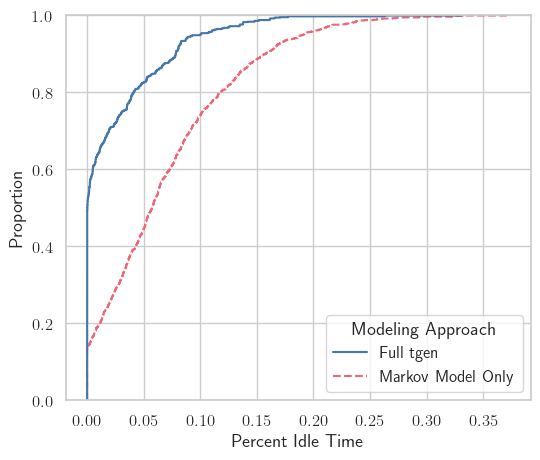

In [19]:
percent_idle_plot = sns.ecdfplot(idle_time_df, x="percent_idle", hue="Modeling Approach")
percent_idle_plot.set(xlabel='Percent Idle Time')

for lines, linestyle, legend_handle in zip(percent_idle_plot.lines[::-1], ['-', '--'], percent_idle_plot.legend_.legendHandles):
    lines.set_linestyle(linestyle)
    #lines.set_color('black')
    legend_handle.set_linestyle(linestyle)
    # legend_handle.set_color('black')
(percent_idle_plot.get_figure()).savefig('../../plots/percent_idle_tgen_vs_mmodel.pdf')

In [20]:
idle_time_df[idle_time_df["Modeling Approach"] == "Full tgen"]["Number of Flows Created"].median()

27.0

In [21]:
idle_time_df[idle_time_df["Modeling Approach"] == "Markov Model Only"]["Number of Flows Created"].median()

25.0

In [22]:
idle_time_df[idle_time_df["Modeling Approach"] == "Full tgen"]["Number of Flows Created"].std()

3.975743870562481

In [23]:
idle_time_df[idle_time_df["Modeling Approach"] == "Markov Model Only"]["Number of Flows Created"].std()

4.029267537266701

/var/folders/b0/v5cl87nj5q5_f0wrtyh4g4kw0000gn/T/ipykernel_84169/56949824.py:4: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for lines, linestyle, legend_handle in zip(num_flows_plot.lines[::-1], ['-', '--'], num_flows_plot.legend_.legendHandles):


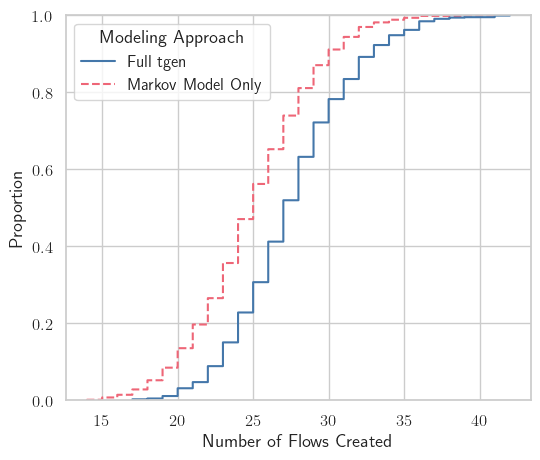

In [24]:
num_flows_plot = sns.ecdfplot(idle_time_df, x="Number of Flows Created", hue="Modeling Approach")
# percent_idle_plot.set(xlabel='Percent Idle Time')

for lines, linestyle, legend_handle in zip(num_flows_plot.lines[::-1], ['-', '--'], num_flows_plot.legend_.legendHandles):
    lines.set_linestyle(linestyle)
    #lines.set_color('black')
    legend_handle.set_linestyle(linestyle)
    # legend_handle.set_color('black')
(percent_idle_plot.get_figure()).savefig('../../plots/num_flows_tgen_vs_mmodel.pdf')

### => still less idle time with tgen, which makes sense since markovmodel_getNextObservation is only called in tgenstream_writePayload, which is in turn called by tgenstream_onWritable, which depends on epoll; so streams still take longer in tgen as opposed to the completely abstract markov model approach as data transfer depends on the readability/writability of sockets.

In [25]:
flow_info_dict = {"kind": [], "duration": [], "inter_creation_interval": []}

In [26]:
for key, val in data_dict_tgen.items():
    
    flow_durations = val["flow_durations"]
    inter_creation_intervals = val["inter_flow_generation_intervals"]

    assert(len(flow_durations) == len(inter_creation_intervals))

    for duration, interval in zip(flow_durations, inter_creation_intervals):

        flow_info_dict["kind"].append("tgen")
        flow_info_dict["duration"].append(duration)
        flow_info_dict["inter_creation_interval"].append(interval)

In [27]:
for key, val in data_dict_mmodel.items():
    
    flow_durations = val["flow_durations"]
    inter_creation_intervals = val["inter_flow_generation_intervals"]

    assert(len(flow_durations) == len(inter_creation_intervals))

    for duration, interval in zip(flow_durations, inter_creation_intervals):

        flow_info_dict["kind"].append("markov_model")
        flow_info_dict["duration"].append(duration)
        flow_info_dict["inter_creation_interval"].append(interval)

In [28]:
flow_info_dict

{'kind': ['tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  'tgen',
  

In [54]:
flow_info_df = pd.DataFrame.from_dict(flow_info_dict)

In [55]:
flow_info_df

,kind,duration,inter_creation_interval
0,tgen,7200000000,0
1,tgen,7175653678,24346322
2,tgen,7117402790,58250888
3,tgen,6989234993,128167797
4,tgen,6921947331,67287662
...,...,...,...
51076,markov_model,1619482774,272810473
51077,markov_model,11363747,395534427
51078,markov_model,12741451,209551194
51079,markov_model,134152223,600000000


In [56]:
flow_info_df["inter_creation_interval"] = flow_info_df["inter_creation_interval"]/1000000

In [57]:
flow_info_df["duration"] = flow_info_df["duration"]/1000000

In [58]:
flow_info_df[flow_info_df["kind"] == "markov_model"]["inter_creation_interval"].median()

191.528411

In [59]:
flow_info_df[flow_info_df["kind"] == "markov_model"]["inter_creation_interval"].std()

201.65273888964114

In [60]:
flow_info_df[flow_info_df["kind"] == "tgen"]["inter_creation_interval"].median()

189.260965

In [61]:
flow_info_df[flow_info_df["kind"] == "tgen"]["inter_creation_interval"].mean()

243.2914209180695

In [35]:
flow_info_df[flow_info_df["kind"] == "tgen"]["inter_creation_interval"].std()

199.00904924133602

In [36]:
flow_info_df = flow_info_df.rename(columns={"inter_creation_interval": "Inter-Flow-Creation Interval (Seconds)"})

In [37]:
flow_info_df = flow_info_df.rename(columns={"kind": "Modeling Approach"})

In [38]:
flow_info_df['Modeling Approach'] = np.where(flow_info_df['Modeling Approach'] == "tgen", "Full tgen","Markov Model Only")

In [39]:
flow_info_df[flow_info_df["Modeling Approach"] == "Full tgen"]["Inter-Flow-Creation Interval (Seconds)"].median()

189.260965

In [40]:
flow_info_df[flow_info_df["Modeling Approach"] == "Full tgen"]["Inter-Flow-Creation Interval (Seconds)"].std()

199.00904924133602

In [41]:
flow_info_df[flow_info_df["Modeling Approach"] == "Markov Model Only"]["Inter-Flow-Creation Interval (Seconds)"].median()

191.528411

In [42]:
flow_info_df[flow_info_df["Modeling Approach"] == "Markov Model Only"]["Inter-Flow-Creation Interval (Seconds)"].std()

201.65273888964114

/var/folders/b0/v5cl87nj5q5_f0wrtyh4g4kw0000gn/T/ipykernel_84169/1400578419.py:2: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for lines, linestyle, legend_handle in zip(inter_flow_creation_plot.lines[::-1], ['-', '--'], inter_flow_creation_plot.legend_.legendHandles):


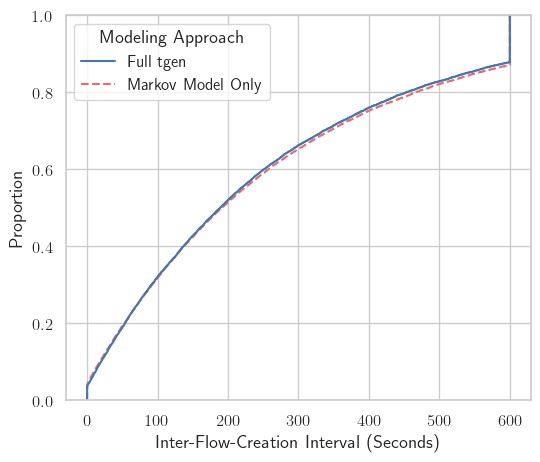

In [43]:
inter_flow_creation_plot = sns.ecdfplot(flow_info_df, x="Inter-Flow-Creation Interval (Seconds)", hue="Modeling Approach")
for lines, linestyle, legend_handle in zip(inter_flow_creation_plot.lines[::-1], ['-', '--'], inter_flow_creation_plot.legend_.legendHandles):
    lines.set_linestyle(linestyle)
    #lines.set_color('black')
    legend_handle.set_linestyle(linestyle)
    # legend_handle.set_color('black')
(inter_flow_creation_plot.get_figure()).savefig('../../plots/inter_flow_creation_interval_tgen_vs_mmodel.pdf')

In [48]:
flow_info_df[flow_info_df["Modeling Approach"] == "Full tgen"]["duration"].median()

3851.803206

In [49]:
flow_info_df[flow_info_df["Modeling Approach"] == "Full tgen"]["duration"].std()

2051.51011923484

In [50]:
flow_info_df[flow_info_df["Modeling Approach"] == "Markov Model Only"]["duration"].median()

604.332381

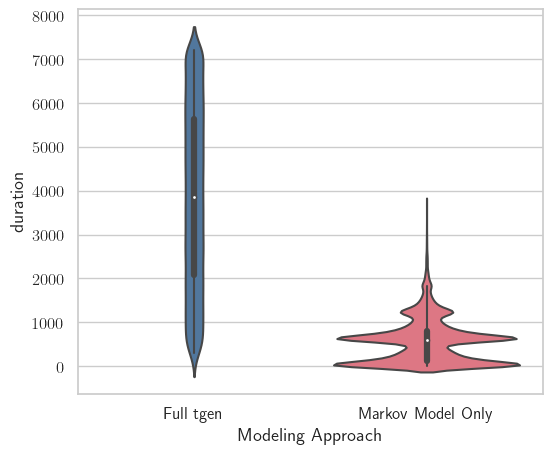

In [52]:
flow_duration_plot = sns.violinplot(flow_info_df, y="duration", x="Modeling Approach")